In [50]:
from utilities.std_imports import *
import random as rd
import statsmodels.tsa.stattools as sts
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### Generate random time series

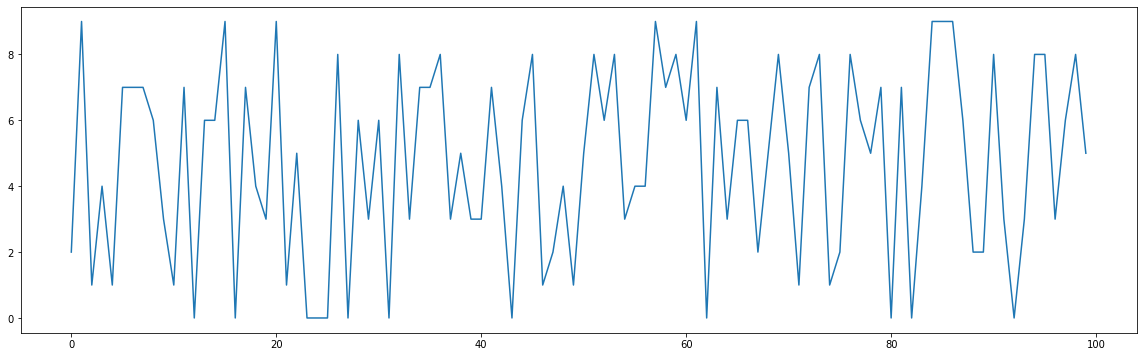

In [28]:
seed(1)
ts_rand = [rd.randrange(10) for i in range(100)]
plt.figure(figsize=[20, 6])
plt.plot(ts_rand);

### Random walk

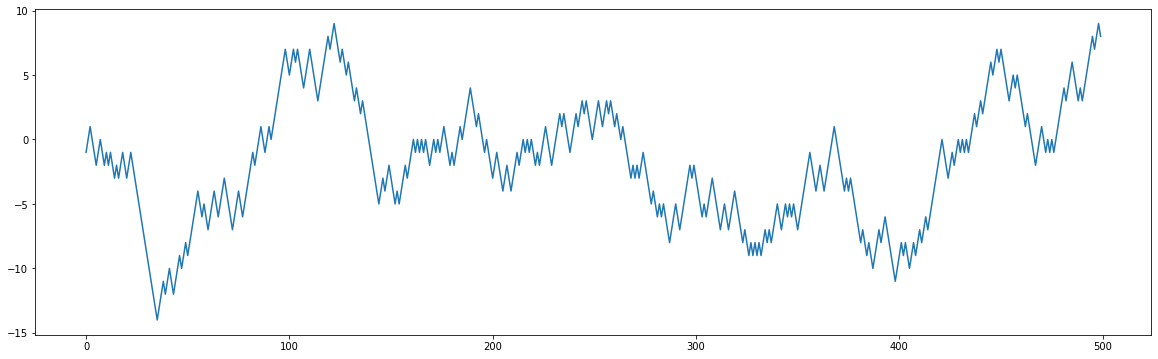

In [37]:
seed(1)
ts_rw = []
ts_rw.append(-1 if rd.random() < 0.5 else 1)
for i in range(1, 500):
    step = -1 if rd.random() < 0.5 else 1
    value = rw[i-1] + step
    ts_rw.append(value)
plt.figure(figsize=[20, 6])
plt.plot(ts_rw);

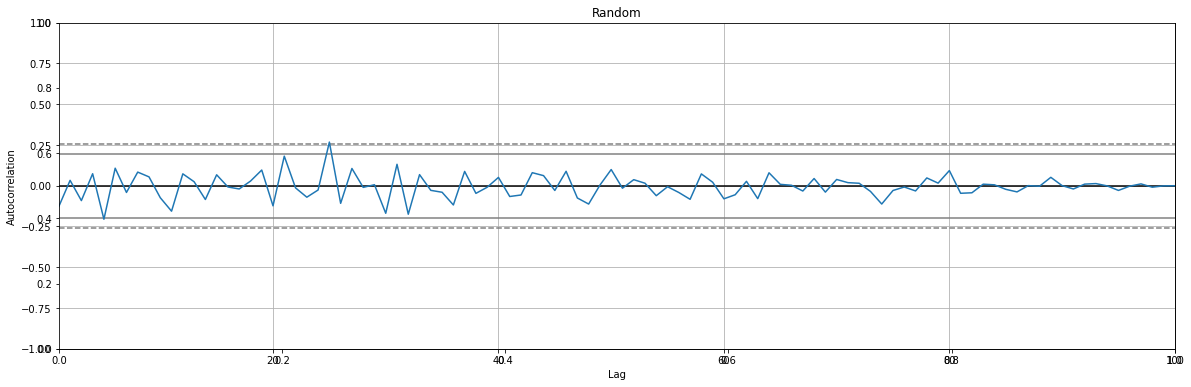

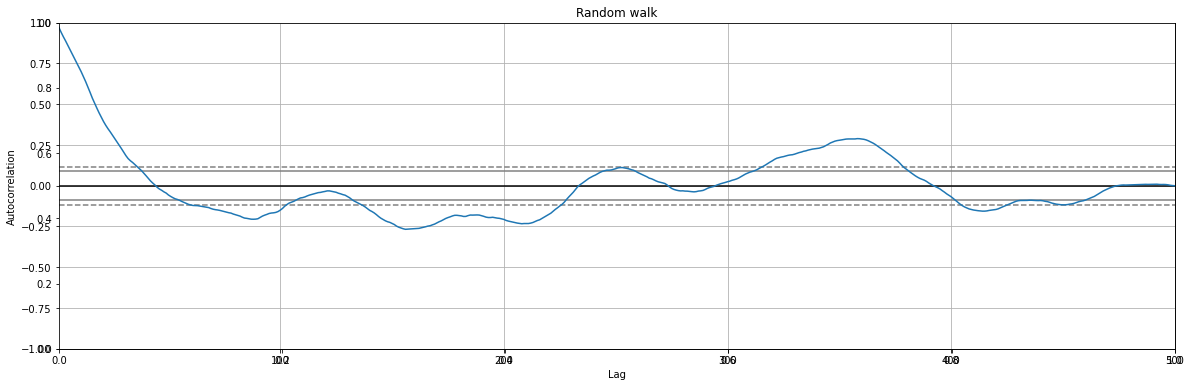

In [51]:
plt.figure(figsize=[20, 6])
plt.title('Random')
pd.plotting.autocorrelation_plot(ts_rand);
plt.show()
plt.figure(figsize=[20, 6])
plt.title('Random walk')
pd.plotting.autocorrelation_plot(ts_rw);
plt.show()

### Stationarity
H0: Non-stationary  
Random values are stationary but random walk is not

In [39]:
res = sts.adfuller(ts_rand)
print('Random p-value: ',  res[1])
res = sts.adfuller(ts_rw)
print('Random walk p-value: ',  res[1])

Random p-value:  1.767609104410042e-20
Random walk p-value:  0.3057094896047884


### Differencing for stationarity

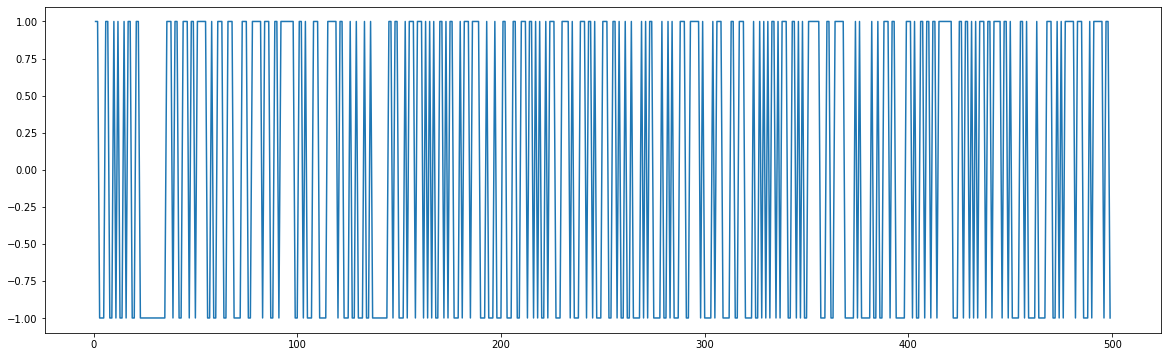

In [40]:
ts_rw_s = pd.Series(ts_rw)
ts_rw_diff = ts_rw_s.diff(periods=1)
plt.figure(figsize=[20, 6])
plt.plot(ts_rw_diff);

In [44]:
pd.plotting.autocorrelation_plot(ts_rw_diff);

In [49]:
ts_rw_diff = ts_rw_diff.dropna()
res = sts.adfuller(ts_rw_diff)
print('Random walk diff p-value: ',  res[1])

Random walk diff p-value:  0.0


### Credits & Links

https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/